## Import the required libraries

In [385]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

from six import StringIO

from IPython.display import Image

import pydotplus

import warnings

warnings.filterwarnings('ignore')

## Read the Data from the CSV

In [234]:
dummy_df = pd.read_csv('bank.csv', na_values=['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [235]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [236]:
dummy_df.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


<AxesSubplot:xlabel='education', ylabel='balance'>

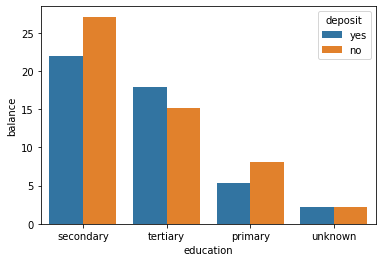

In [237]:
sns.barplot(x="education", y="balance", hue="deposit", data=dummy_df, estimator=lambda x: len(x) / len(dummy_df) * 100)

<AxesSubplot:xlabel='month', ylabel='count'>

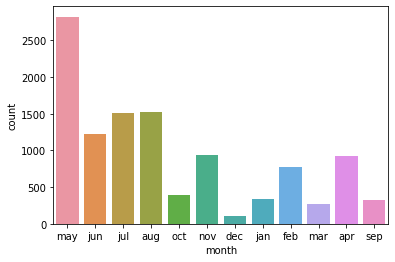

In [243]:
sns.countplot(x="month", data=dummy_df)

<AxesSubplot:xlabel='day', ylabel='count'>

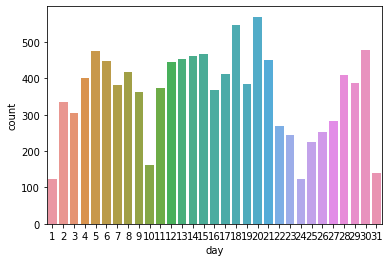

In [244]:
sns.countplot(x="day", data=dummy_df)

In [245]:
dummy_df = dummy_df.drop(dummy_df.loc[dummy_df["job"] == "unknown"].index)

In [246]:
dummy_df['deposit'].value_counts()

no     5837
yes    5255
Name: deposit, dtype: int64

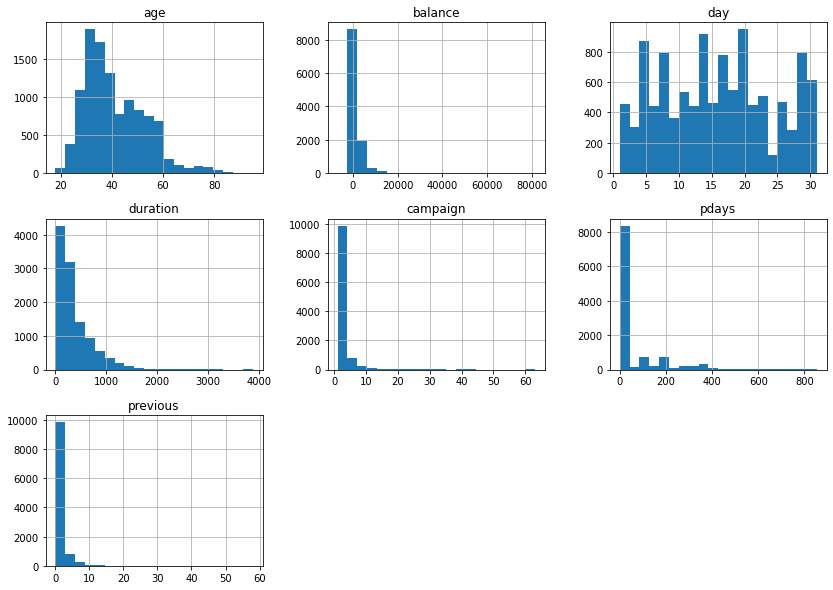

In [247]:
dummy_df.hist(bins=20, figsize=(14,10))
plt.show()

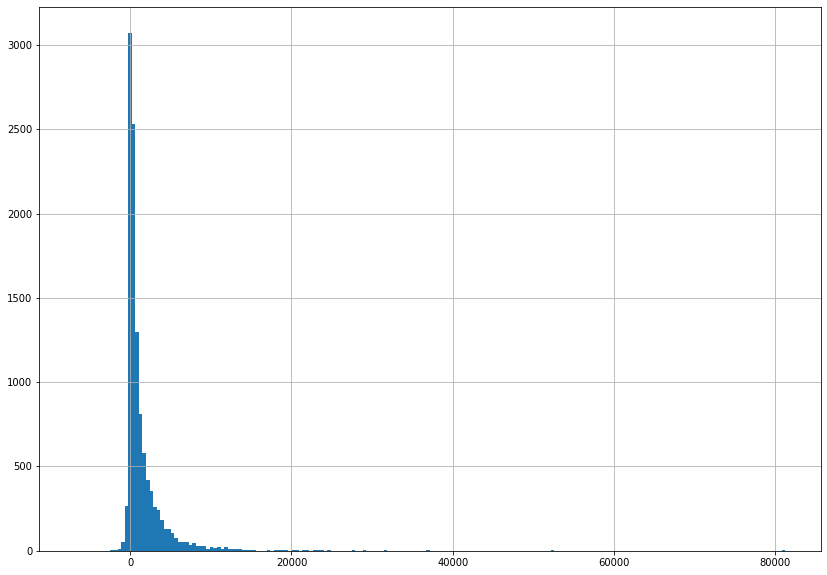

In [248]:
dummy_df['balance'].hist(bins=200, figsize=(14,10))
plt.show()

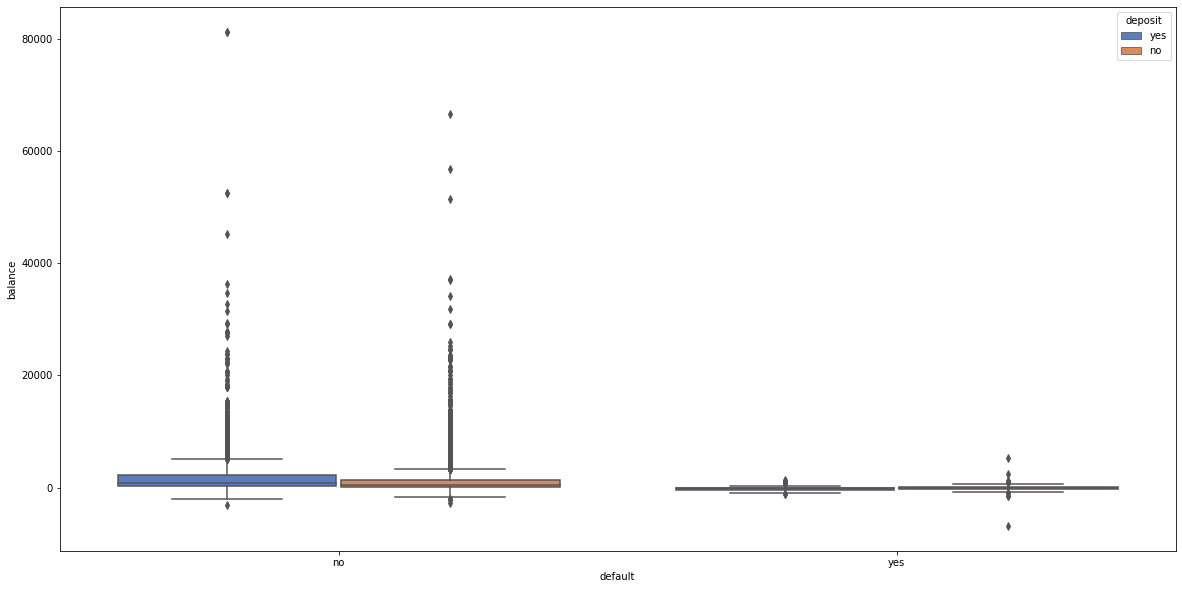

In [10]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x="default", y="balance", hue="deposit",
                    data=dummy_df, palette="muted")
plt.show()

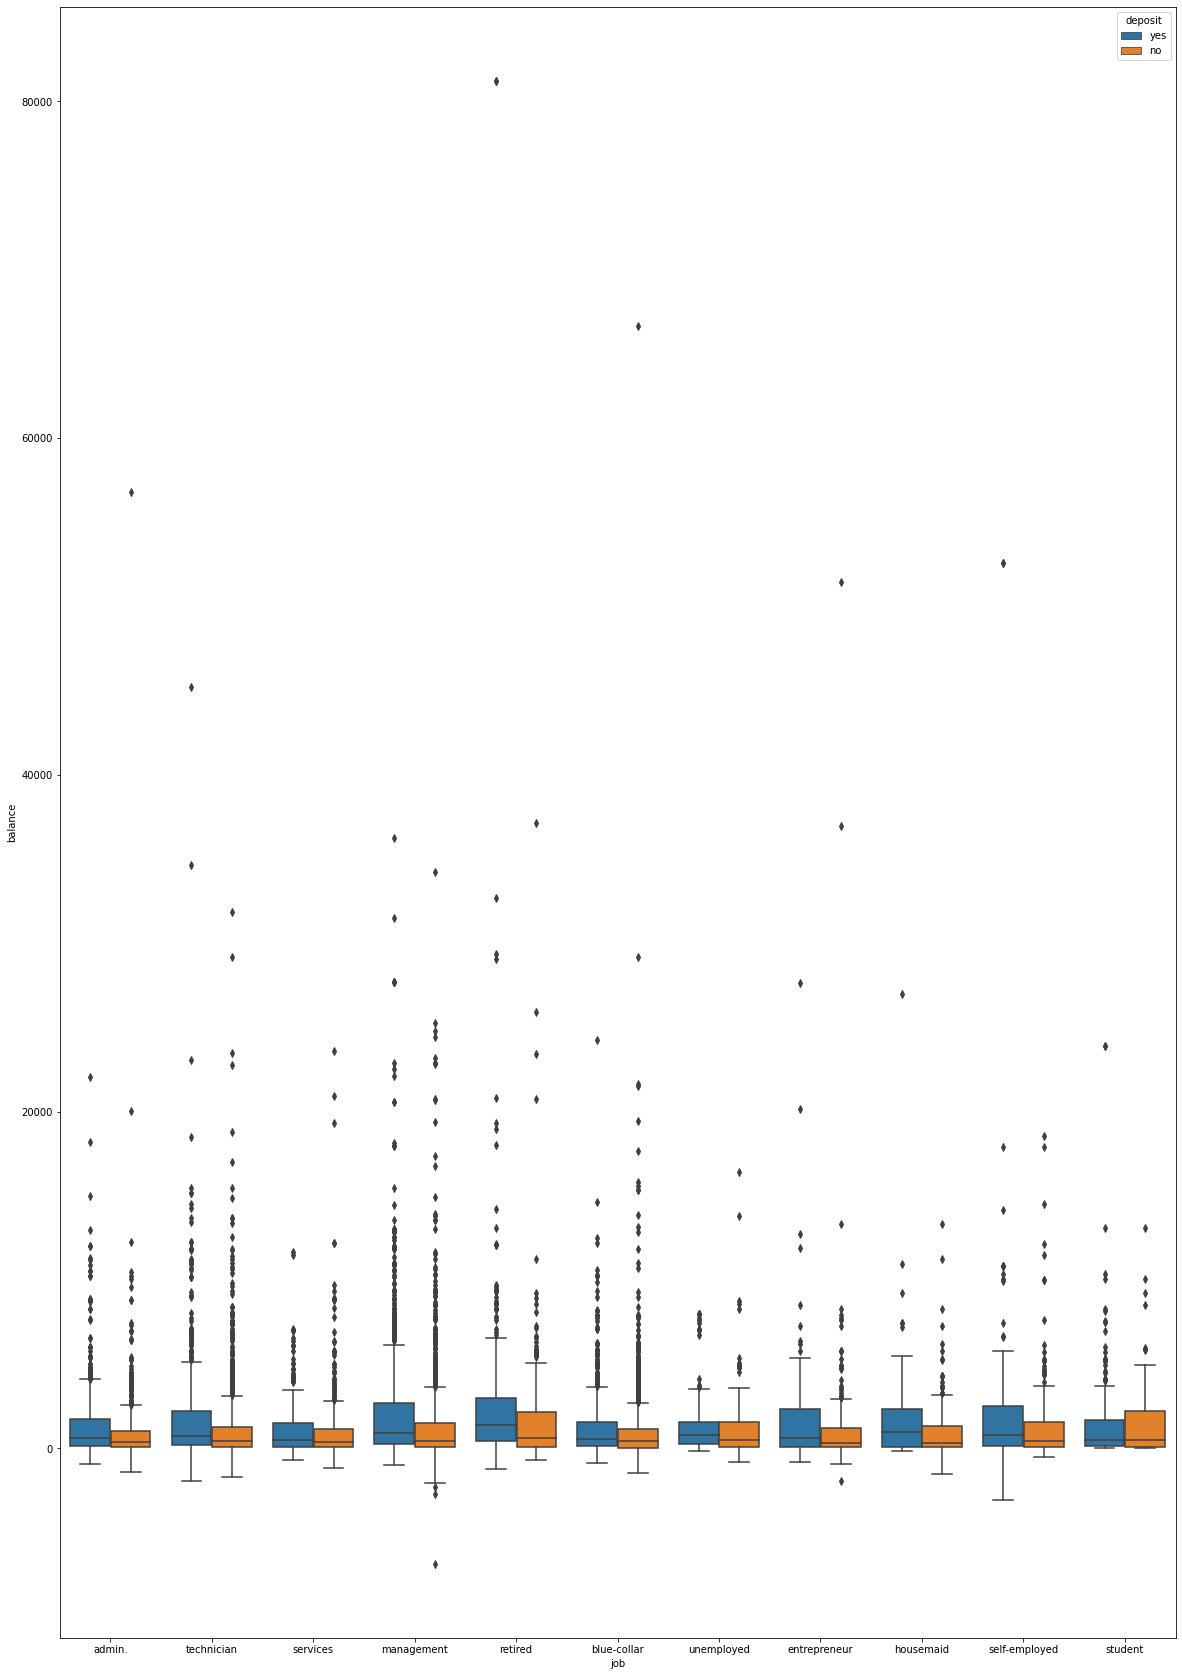

In [11]:
fig = plt.figure(figsize=(20,30))
sns.boxplot(x="job", y="balance", hue="deposit",
                 data=dummy_df)
plt.show()

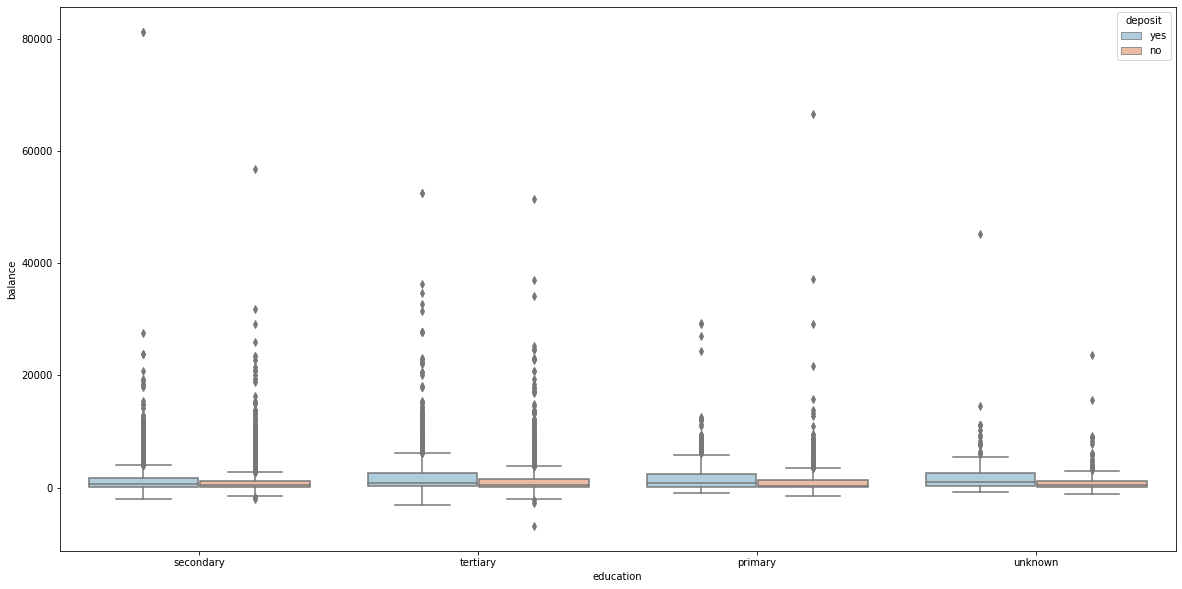

In [12]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=dummy_df, x="education", y="balance", hue="deposit", palette="RdBu_r")
plt.show()

In [250]:
dummy_df = dummy_df.drop(dummy_df.loc[dummy_df["education"] == "unknown"].index)

In [14]:
single = dummy_df['balance'].loc[dummy_df['marital'] == 'single'].values
married = dummy_df['balance'].loc[dummy_df['marital'] == 'married'].values
divorced = dummy_df['balance'].loc[dummy_df['marital'] == 'divorced'].values

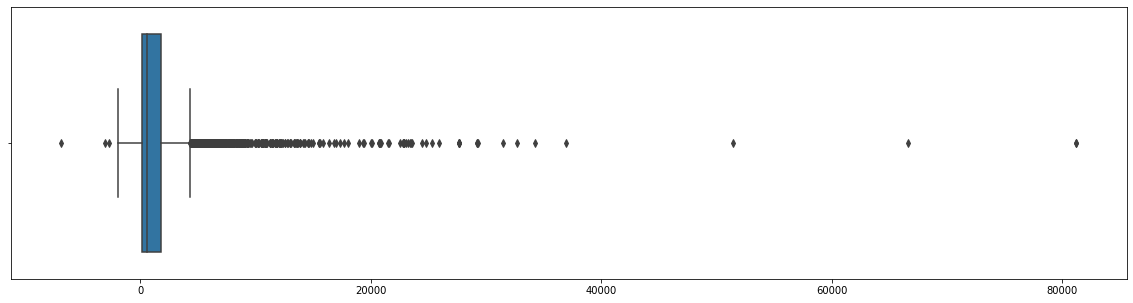

In [15]:
fig = plt.figure(figsize=(20,5))
sns.boxplot(married)
plt.show()

In [253]:
# Getting missing values per column
dummy_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [254]:
# Getting count of each key
dummy_df['contact'].value_counts()

cellular     7692
unknown      2241
telephone     701
Name: contact, dtype: int64

In [255]:
# Also contact column will not be needed
dummy_df = dummy_df.drop(['contact'], axis=1)

In [20]:
# Removing zero variance columns
# num_df = dummy_df.select_dtypes(exclude=['object'])
# dummy_df = num_df.loc[:, num_df.var() == 0.0]
# dummy_df.head()
num_df = dummy_df.select_dtypes(exclude=['object'])
num_df.nunique()

age           76
balance     3790
day           31
duration    1425
campaign      36
pdays        471
previous      34
dtype: int64

In [256]:
dummy_df.nunique()

age            74
job            11
marital         3
education       3
default         2
balance      3702
housing         2
loan            2
day            31
month          12
duration     1411
campaign       34
pdays         468
previous       34
poutcome        4
deposit         2
dtype: int64

In [257]:
dummy_df['poutcome'].value_counts()

unknown    7941
failure    1176
success    1005
other       512
Name: poutcome, dtype: int64

In [258]:
# Grouping others and unknown
dummy_df['poutcome'] = dummy_df['poutcome'].replace(['other'], 'unknown')
dummy_df['poutcome'].value_counts()

unknown    8453
failure    1176
success    1005
Name: poutcome, dtype: int64

In [26]:
dummy_df['duration'].value_counts()

97      39
161     38
119     37
150     37
158     37
        ..
1441     1
1449     1
1489     1
1521     1
2015     1
Name: duration, Length: 1425, dtype: int64

In [259]:
# Getting count by job who has deposited yes
dummy_df.groupby('job')['deposit'].apply(lambda x: x[x == 'yes'].count()).reset_index(name='count').sort_values(by='count', ascending=False)

,job,count
4,management,1253
9,technician,817
1,blue-collar,675
0,admin.,613
5,retired,486
7,services,350
8,student,226
10,unemployed,198
6,self-employed,182
2,entrepreneur,116


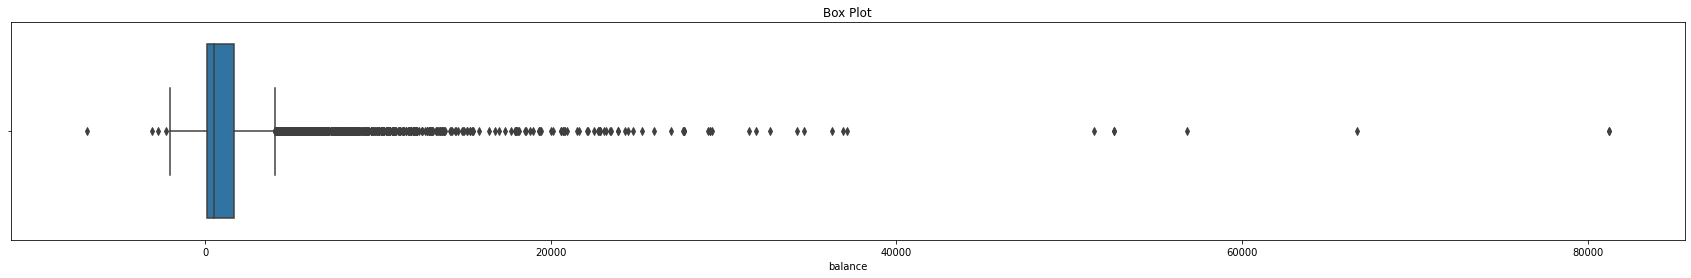

In [260]:
plt.figure(figsize=(30, 4))
plt.title("Box Plot")
sns.boxplot(dummy_df['balance'])
plt.show()

In [261]:
# Dropping extreme outliers
dummy_df = dummy_df.drop(dummy_df.loc[dummy_df['balance'] > 40000].index)

In [264]:
dummy_df['job'].value_counts()

management       3775
blue-collar      1857
technician       1771
services          882
retired           729
self-employed     392
unemployed        350
entrepreneur      313
student           293
housemaid         265
Name: job, dtype: int64

In [263]:
# Combine similar jobs into categiroes
dummy_df['job'] = dummy_df['job'].replace(['admin.'], 'management')
# dummy_df['job'] = dummy_df['job'].replace(['services','housemaid'], 'pink-collar')
# dummy_df['job'] = dummy_df['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [265]:
dummy_df['job'].value_counts()

management       3775
blue-collar      1857
technician       1771
services          882
retired           729
self-employed     392
unemployed        350
entrepreneur      313
student           293
housemaid         265
Name: job, dtype: int64

In [266]:
dummy_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.100713,-0.003628,-0.000223,-0.009102,0.001402,0.013778
balance,0.100713,1.000000,0.016003,0.019695,-0.016659,0.016526,0.035593
day,-0.003628,0.016003,1.000000,-0.018333,0.141868,-0.075973,-0.059239
duration,-0.000223,0.019695,-0.018333,1.000000,-0.040562,-0.028906,-0.026633
campaign,-0.009102,-0.016659,0.141868,-0.040562,1.000000,-0.105220,-0.050429
pdays,0.001402,0.016526,-0.075973,-0.028906,-0.105220,1.000000,0.508758
previous,0.013778,0.035593,-0.059239,-0.026633,-0.050429,0.508758,1.000000


In [267]:
# Checking duplicate values
any(dummy_df.duplicated())

False

In [268]:
# Checking correlation
corrmat = dummy_df.corr().abs()
upper_tri = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
upper_tri
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
to_drop

[]

In [269]:
# Removing days and months. As all days and months are there and no added value is being added to dataset
# dummy_df = dummy_df.drop(['day', 'month'], axis=1)
dummy_df = dummy_df.drop(['day'], axis=1)

In [ ]:
# dummy_df = dummy_df.drop(['duration'],axis =1)

In [270]:
dummy_df.loc[dummy_df['pdays'] == -1, 'pdays'] = 10000

In [271]:
dummy_df['recent_days'] = dummy_df['pdays'].apply(lambda x: 1 / x)

In [272]:
dummy_df = dummy_df.drop(['pdays'],axis =1)

In [273]:
dummy_df.corr()

,age,balance,duration,campaign,previous,recent_days
age,1.000000,0.100713,-0.000223,-0.009102,0.013778,0.008203
balance,0.100713,1.000000,0.019695,-0.016659,0.035593,-0.003092
duration,-0.000223,0.019695,1.000000,-0.040562,-0.026633,-0.013041
campaign,-0.009102,-0.016659,-0.040562,1.000000,-0.050429,-0.025967
previous,0.013778,0.035593,-0.026633,-0.050429,1.000000,0.123392
recent_days,0.008203,-0.003092,-0.013041,-0.025967,0.123392,1.000000


## Data Pre-Processing

In [274]:
contact_df = dummy_df

In [282]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
#     res_df['contact'] = le.fit_transform(res_df['contact'])
#     res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [283]:
encoded_df = preprocessor(contact_df)

In [284]:
encoded_df.describe()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_days
count,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000
mean,41.012609,3.924438,1.198551,1.205608,0.014962,1477.307519,0.480286,0.134657,5.448010,373.315235,2.502023,0.837772,1.684295,0.472099,0.003034
std,11.723781,2.760029,0.626525,0.666460,0.121406,2791.837268,0.499635,0.341373,3.188831,349.288165,2.632892,2.318112,0.661362,0.499244,0.029512
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000100
25%,32.000000,3.000000,1.000000,1.000000,0.000000,119.000000,0.000000,0.000000,3.000000,138.000000,1.000000,0.000000,2.000000,0.000000,0.000100
50%,38.000000,3.000000,1.000000,1.000000,0.000000,541.000000,0.000000,0.000000,6.000000,255.000000,2.000000,0.000000,2.000000,0.000000,0.000100
75%,49.000000,6.000000,2.000000,2.000000,0.000000,1689.000000,1.000000,0.000000,8.000000,500.000000,3.000000,1.000000,2.000000,1.000000,0.001802
max,95.000000,9.000000,2.000000,2.000000,1.000000,37127.000000,1.000000,1.000000,11.000000,3881.000000,43.000000,58.000000,2.000000,1.000000,1.000000


In [ ]:
encoded_df[encoded_df['balance'] < 0 ]

In [186]:
# Adding constant value to apply log trasformation
encoded_df['balance'] = encoded_df['balance']+6848

In [770]:
encoded_df['pdays'] = encoded_df['pdays']+2

In [ ]:
encoded_df.corr()

In [632]:
encoded_df['pdays'].var()

11881.489145995787

In [187]:
encoded_df['balance'] = np.log(encoded_df['balance'])

In [528]:
encoded_df['duration'] = np.log(encoded_df['duration'])

In [772]:
encoded_df['pdays'] = np.log(encoded_df['pdays'])

In [ ]:
balance_scaled = StandardScaler().fit_transform(encoded_df['age'][:,np.newaxis]);
low_range = balance_scaled[balance_scaled[:,0].argsort()][:10]
high_range= balance_scaled[balance_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [580]:
# Do not apply
encoded_df['default'].var()
encoded_df = encoded_df.drop(['default'], axis=1)

In [350]:
# Do not apply
encoded_df['pdays'].var()
encoded_df = encoded_df.drop(['pdays'], axis=1)

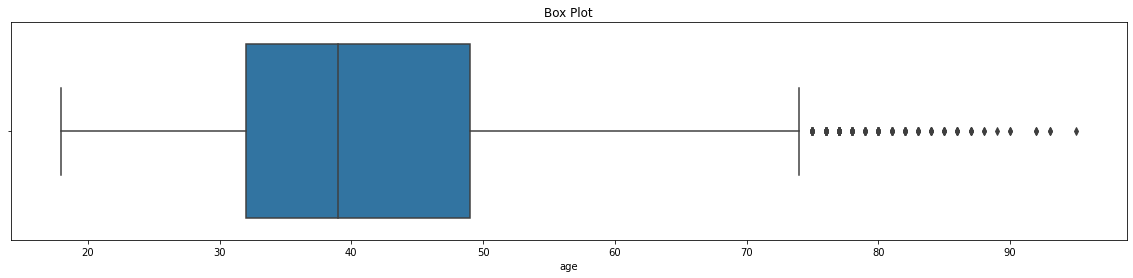

In [851]:
plt.figure(figsize=(20, 4))
plt.title("Box Plot")
sns.boxplot(encoded_df['age'])
plt.show()

In [155]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(encoded_df['age'])

Outliers: [75, 85, 90, 85, 83, 76, 83, 77, 77, 76, 78, 95, 78, 75, 76, 85, 83, 79, 82, 79, 75, 76, 82, 77, 86, 76, 79, 83, 77, 84, 83, 75, 77, 76, 77, 87, 76, 92, 78, 82, 76, 77, 76, 81, 75, 80, 87, 76, 82, 77, 76, 81, 75, 78, 80, 86, 79, 79, 81, 75, 84, 87, 85, 79, 92, 77, 81, 80, 77, 78, 76, 80, 77, 76, 75, 82, 80, 78, 90, 83, 80, 82, 80, 84, 86, 75, 76, 77, 76, 77, 80, 78, 75, 84, 78, 80, 80, 79, 86, 93, 82, 82, 77, 93, 77, 75, 80, 84, 75, 78, 81, 81, 77, 78, 75, 77, 77, 77, 78, 77, 79, 75, 80, 76, 78, 79, 75, 77, 79, 78, 88, 77, 85, 78, 80, 82, 75, 77, 78, 78, 76, 81, 77, 75, 80, 80, 80, 76, 77, 81, 76, 76, 87, 81, 78, 82, 83, 77, 77, 75, 76, 89, 80, 77, 77, 88, 78, 86]


In [223]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(encoded_df, 'age')

In [ ]:
encoded_df.describe()

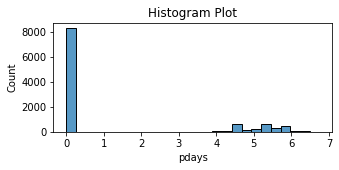

In [775]:
plt.figure(figsize=(5, 2))
plt.title("Histogram Plot")
sns.histplot(encoded_df['pdays'])
plt.show()

In [285]:
x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

In [286]:
encoded_df.describe()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_days
count,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000
mean,41.012609,3.924438,1.198551,1.205608,0.014962,1477.307519,0.480286,0.134657,5.448010,373.315235,2.502023,0.837772,1.684295,0.472099,0.003034
std,11.723781,2.760029,0.626525,0.666460,0.121406,2791.837268,0.499635,0.341373,3.188831,349.288165,2.632892,2.318112,0.661362,0.499244,0.029512
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000100
25%,32.000000,3.000000,1.000000,1.000000,0.000000,119.000000,0.000000,0.000000,3.000000,138.000000,1.000000,0.000000,2.000000,0.000000,0.000100
50%,38.000000,3.000000,1.000000,1.000000,0.000000,541.000000,0.000000,0.000000,6.000000,255.000000,2.000000,0.000000,2.000000,0.000000,0.000100
75%,49.000000,6.000000,2.000000,2.000000,0.000000,1689.000000,1.000000,0.000000,8.000000,500.000000,3.000000,1.000000,2.000000,1.000000,0.001802
max,95.000000,9.000000,2.000000,2.000000,1.000000,37127.000000,1.000000,1.000000,11.000000,3881.000000,43.000000,58.000000,2.000000,1.000000,1.000000


## Split the data into Train-Test

In [395]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Build the Decision Tree Model

In [288]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.7620279967062699
Testing score:  0.7582314205079962


In [294]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)

Training score:  0.7763792495000588
Testing score:  0.7657572906867357


In [295]:
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=20, criterion = "gini", min_samples_split=12,
                                    min_samples_leaf=8)

tree = model_dt_8.fit(x_train, y_train)
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
indices
# We can see that column duration has maximum gini followed by pdays and then month. Gini in descending order: 
# duration > pdays > months  > housing ....

array([ 9, 13,  8,  6,  5,  0, 12, 10,  1,  3, 11,  2,  7,  4])

In [409]:
# Columns indices to see which column has maximum gini (refered in above blick)
i = 1
for col in encoded_df:
    print("%d %s" %(i-1, col))
    i += 1

0 age
1 job
2 marital
3 education
4 default
5 balance
6 housing
7 loan
8 month
9 duration
10 campaign
11 previous
12 poutcome
13 deposit
14 recent_days


In [422]:
# Decision tree with depth = 15
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=15, criterion = "gini", min_samples_split=40,
                                    min_samples_leaf=10)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.854134807669686
Testing score:  0.8142050799623707


In [423]:
# doing cross-validation
tree_scores = cross_val_score(model_dt_8, x_train, y_train, cv=10)
tree_mean = tree_scores.mean()
tree_mean

0.805198866385567

# Parameters after running GridSearchCV

In [407]:
model_dt_10 = DecisionTreeClassifier(random_state=1, max_depth=10, criterion = "gini", min_samples_split=50,
                                    min_samples_leaf=10)
model_dt_10.fit(x_train, y_train)
model_dt_10_score_train = model_dt_10.score(x_train, y_train)
print("Training score: ",model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(x_test, y_test)
print("Testing score: ",model_dt_10_score_test)

Training score:  0.8423714857075638
Testing score:  0.8184383819379115


In [343]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(x_train, y_train)
# y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

# Hyperparameter optimization using GridSearchCV

In [405]:
model_dt_gs = DecisionTreeClassifier(random_state=42)

param_dist = {'criterion': ['entropy', 'gini'], 
              'max_depth': [2,4,6,8,10,12],
              'min_samples_leaf': [3, 5, 10, 20, 30, 50, 100],
              'min_samples_split': [3, 10, 20, 40, 50, 100]}

cv_rf = GridSearchCV(model_dt_gs, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 100}


## Performance Metrics

In [371]:
y_pred_dt = model_dt_8.predict_proba(x_test)[:, 1]
y_pred_dt

array([0.73529412, 0.10714286, 1.        , ..., 0.85294118, 0.29166667,
       0.91304348])

In [357]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [374]:
predictions = model_dt_8.predict(x_test)
predictions

array([1, 0, 1, ..., 1, 0, 1])

# csv generated for predicted values along with actual values

In [421]:
new_df = pd.DataFrame(np.stack((y_test, predictions), axis=1))
new_df.columns = ['actual', 'predicted']
new_df.to_csv('new_bank.csv', index=False)

In [379]:
y_actual_result = 1
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [380]:
len(y_actual_result)

1077

## Recall

In [381]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.7883008356545961


## Area Under the Curve

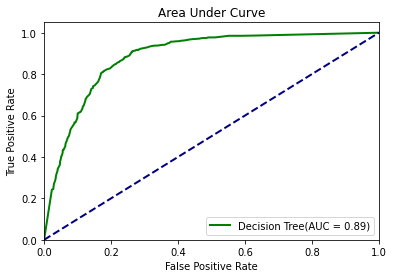

In [382]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [383]:
print (confusion_matrix(y_test, predictions))

[[887 228]
 [163 848]]


In [384]:
accuracy_score(y_test, predictions)

0.8160865475070554

In [352]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

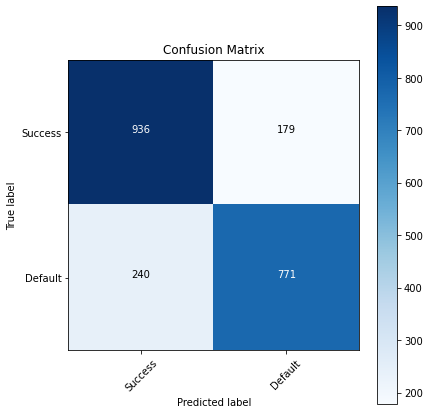

In [353]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()